# Лабораторная работа No7
# Классификация (Байесовские методы, деревья)

## Загрузка данных

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data = pd.read_csv('iris.data',header=None)

X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)


## Байесовские методы

Проведем классификацию наблюдений [наивный байесовским методом](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)


In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены


4


Опишите атрибуты данного классификатора


- class_count_ - количество тренировочных сэмплов, которые наблюдаются в каждом классе.
- class_prior_- вероятность каждого из классов.
- classes_- метки классов, известные классификатору.
- epsilon_- абсолютное добавочное значение для дисперсий.
- sigma_- дисперсия каждой фичи в каждом классе.
- theta_- среднее кажой фичи каждого класса.

Используя функцию score() выведите точность классификации


In [9]:
print(gnb.score(X_test, y_test))

0.9466666666666667


Постройте график зависимости неправильно классифицированных наблюдений и
точности классификации от размера тестовой выборки. Размер тестовой выборки
изменяйте от 0.05 до 0.95 с шагом 0.05. Параметр random_state сделайте равным
номеру своей зачетной книжки. Обоснуйте полученные результаты.


In [10]:
def plot_clf(clf, title=""):
    test_sizes = np.arange(0.05, 0.95, 0.05)
    wrong_results = []
    accuracies = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630706)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        accuracies.append(clf.score(X_test, y_test))


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(test_sizes, wrong_results, label = "Wrong classified")
    axs[1].plot(test_sizes, accuracies, label = "Accuracy")
    axs[0].legend()
    axs[1].legend()
    axs[0].set_xlabel(title)
    axs[1].set_xlabel(title)
    plt.tight_layout()
    plt.show()
    max_acc_index = accuracies.index(np.max(accuracies))
    print(wrong_results[max_acc_index])
    print(np.max(accuracies))

Проведите классификацию используя [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB), [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB), [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB) .
Опишите особенности методов.


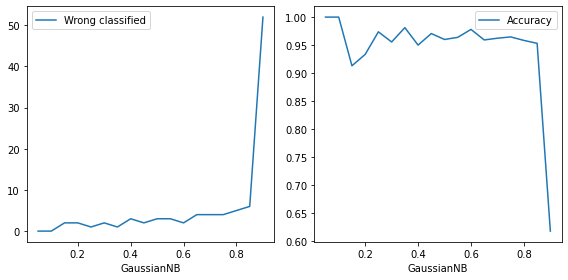

0
1.0


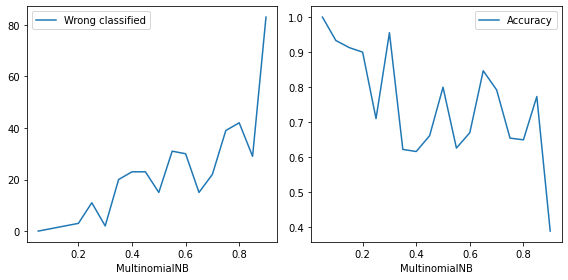

0
1.0


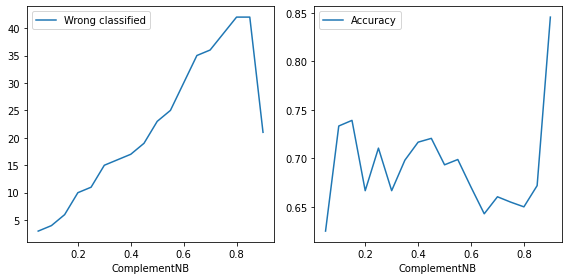

21
0.8455882352941176


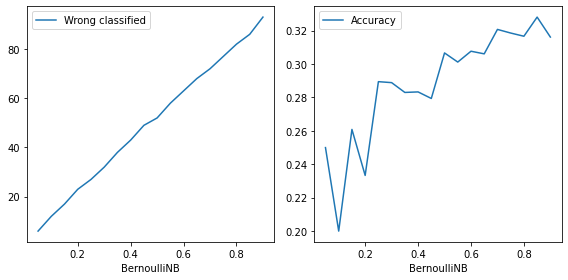

86
0.328125


In [12]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

plot_clf(gnb, 'GaussianNB')
plot_clf(mnb, 'MultinomialNB')
plot_clf(cnb, 'ComplementNB')
plot_clf(bnb, 'BernoulliNB')


TODO: Опишите особенности 4-х методов

## Классифицирующие деревья


 Классификацию при помощи деревьях на тех же данных


In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())


4


Используя функцию score() выведите точность классификации


In [14]:
print("Score: ", clf.score(X_test, y_test))

Score:  0.9466666666666667


Выведите характеристики дерева, количество листьев и глубину, используя функции
get_n_leaves и get_depth


In [15]:
print('Num of leaves: ', clf.get_n_leaves())
print('Depth: ', clf.get_depth())

Num of leaves:  6
Depth:  5


Выведите изображение полученного дерева


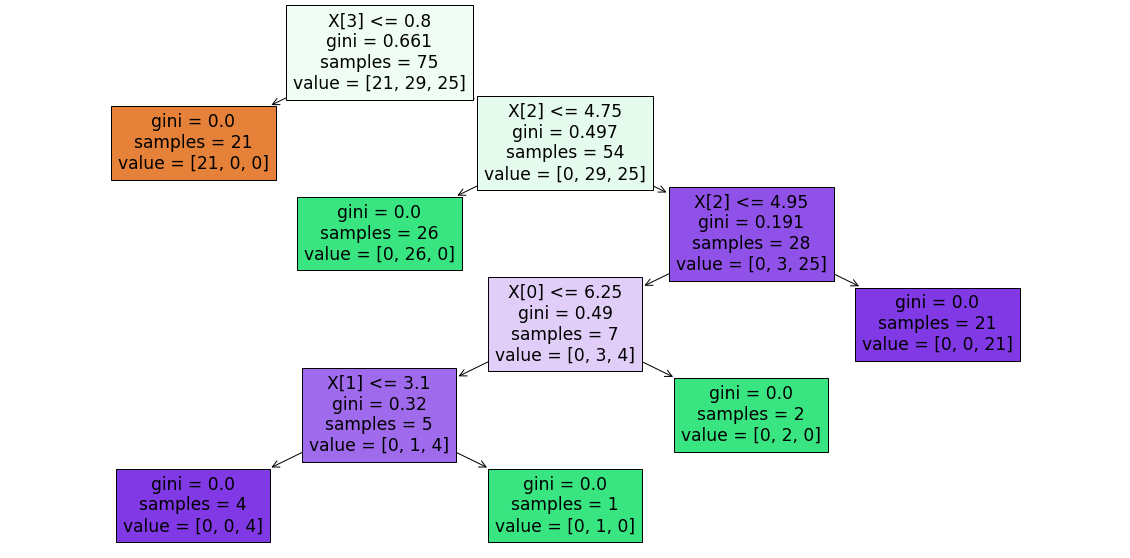

In [20]:
import matplotlib.pyplot as plt

plt.subplots(1,1,figsize = (20,10))
tree.plot_tree(clf, filled = True)
plt.show()


TODO: Опишите полученный рисунок


 Постройте график зависимости неправильно классифицированных наблюдений и
точности классификации от размера тестовой выборки. Размер тестовой выборки
изменяйте от 0.05 до 0.95 с шагом 0.05. Параметр random_state сделайте равным
номеру своей зачетной книжки. Обоснуйте полученные результаты.


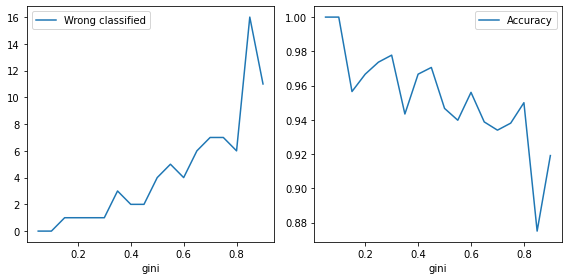

0
1.0


In [25]:
plot_clf(clf, "gini")

TODO: Обоснуйте полученные результаты

 Исследуйте работу классифицирующего дерева при различных параметрах criterion,
splitter, max_depth, min_samples_split, min_samples_leaf


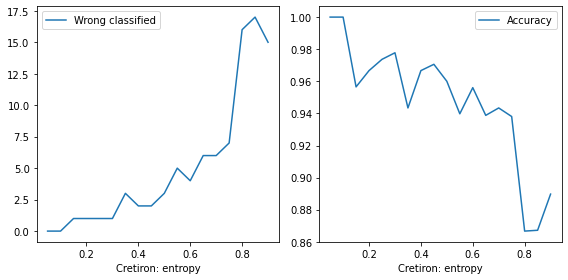

0
1.0


In [28]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
plot_clf(clf, "Cretiron: entropy")

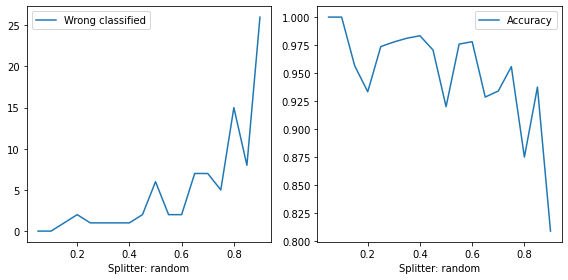

0
1.0


In [29]:
clf = tree.DecisionTreeClassifier(splitter="random")

plot_clf(clf, "Splitter: random")

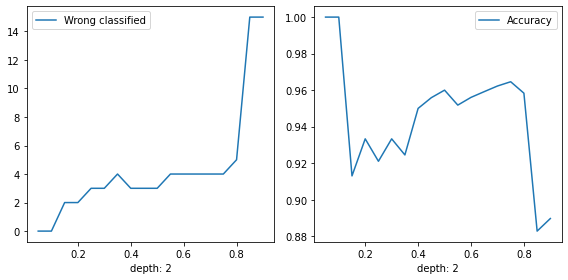

0
1.0


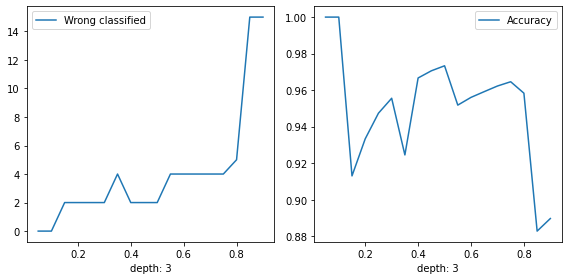

0
1.0


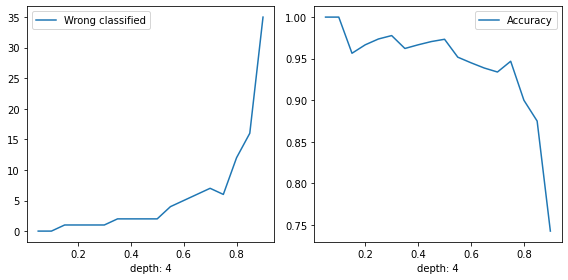

0
1.0


In [30]:
depths = np.arange(2, 5, 1)
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    plot_clf(clf, f'depth: {depth}')


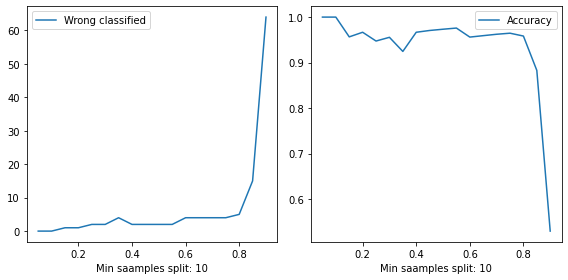

0
1.0


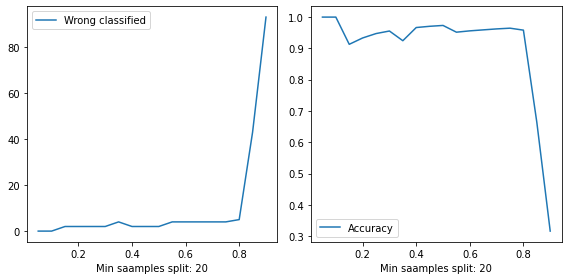

0
1.0


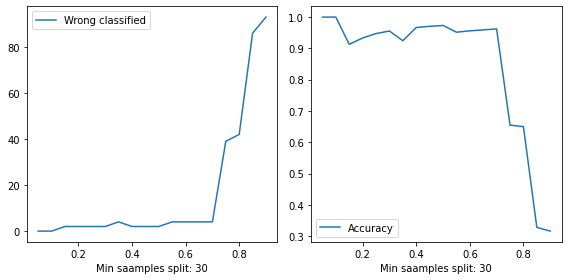

0
1.0


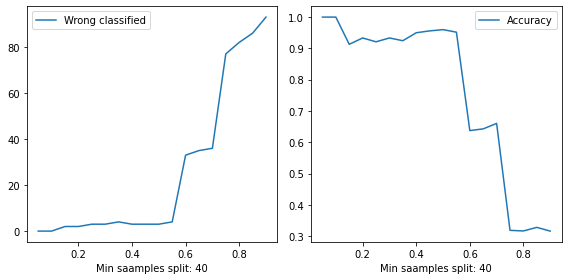

0
1.0


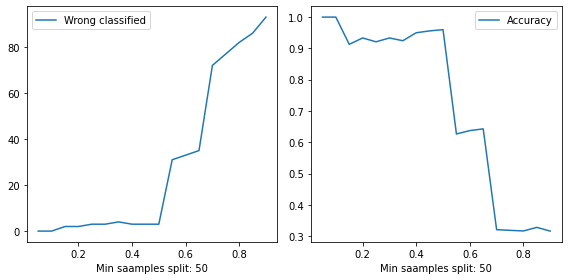

0
1.0


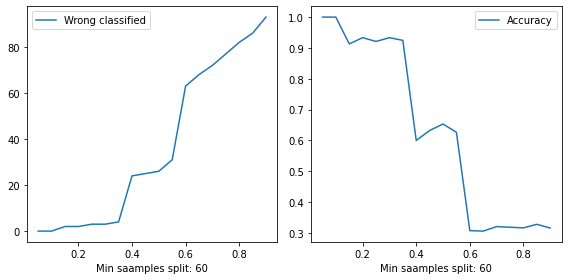

0
1.0


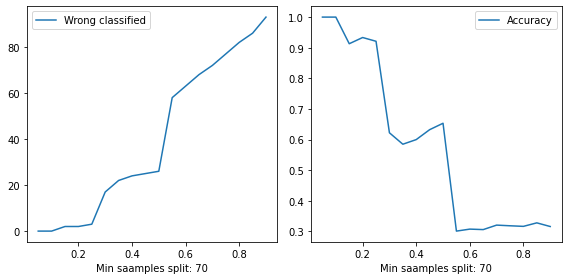

0
1.0


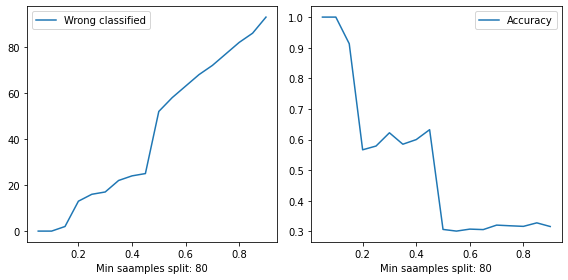

0
1.0


In [31]:
min_samples = np.arange(10, 90, 10)
for min_sample in min_samples:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_sample)
    plot_clf(clf, f'Min saamples split: {min_sample}')

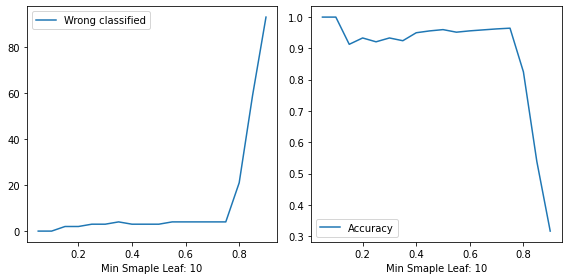

0
1.0


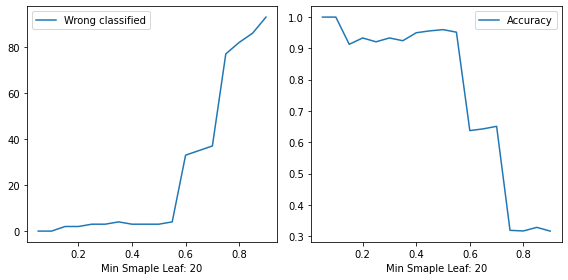

0
1.0


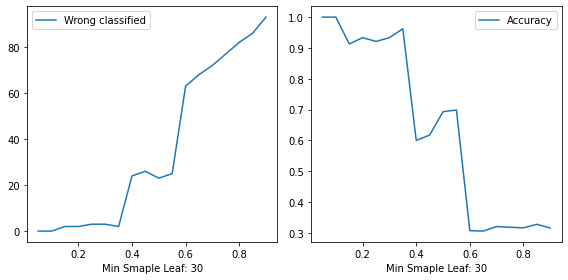

0
1.0


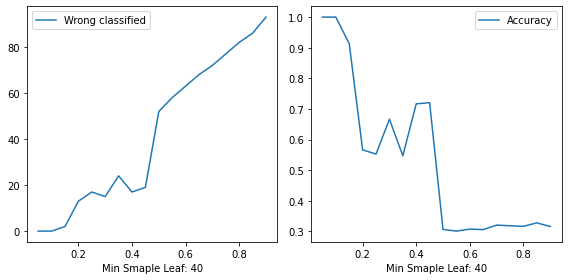

0
1.0


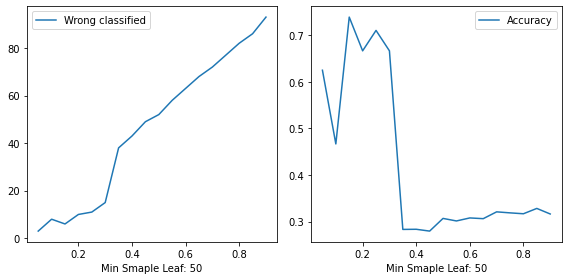

6
0.7391304347826086


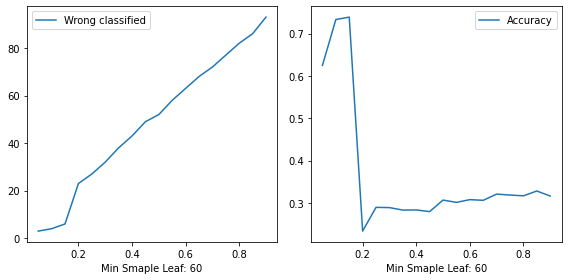

6
0.7391304347826086


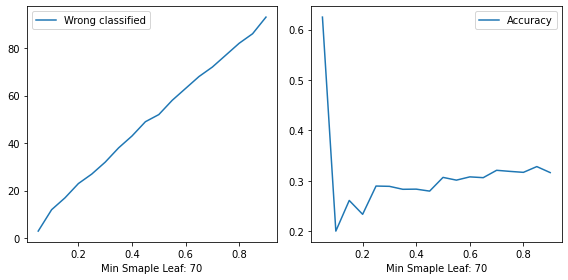

3
0.625


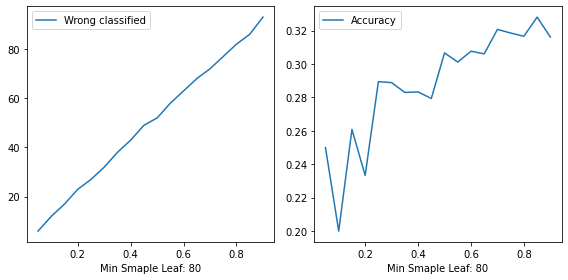

86
0.328125


In [32]:
min_samples = np.arange(10, 90, 10)
for min_sample in min_samples:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_sample)
    plot_clf(clf, f'Min Smaple Leaf: {min_sample}')